## Цой Евгений
## Examination Project (Project #3)
## Sequential Gaussian Simulation
### Реализация осуществлена с применением ООП на Python (как и требовалось по условию)

_______________________________________________________________________________________________________________________________
#### 0. Representative Distribution and Transform

In [1]:
#во-первых задам ключевые параметры распределения
mean = 0.15 #математическое ожидание
standard_deviation = 0.03 #стандартная ошибка

print('mean:', mean)
print('st. deviation:', standard_deviation)

mean: 0.15
st. deviation: 0.03


Сразу стоит упомянуть, что в работе предполагается работа с нормальным (гауссовым) распределением

In [2]:
from scipy.stats import norm #импортирую для работы с нормальными непрерывными случайными величинами
import pandas as pd #для занесения данных в DataFrame и наглядного отображения колонок

In [3]:
#преобразую два списка в словарь для сопоставления p-values с полученными значениями ppf
#приступаю к применению ООП в работе

class Input_Distribution: #класс - входное распределение
    #суть данного класса - у меня имеется среднее значение и стандартное отклонение, 
    #так вот по ним я должен смоделировать распределение
    
    def __init__(self, P_value, Data, Standard_Normal):
        self.P_value = P_value
        self.Data = Data
        self.Standard_Normal = Standard_Normal
    
    #реализация этой части в Excel находится ниже основной области и представлена тремя колонками: P, Data и Standard Normal
    #автор работы Excel моделирует распределение используя 100 p-values и 2 граничных, то есть итого 102 значения

Distribution_values = [] #создам пустой список для дальнейшего занесения значений

#здесь очень важно понимать, что помимо генерации данных, представленными колонкой Data
#этой колонке Data я должен сопоставить значения стандартного нормального распределения (представлены колонкой Standard Normal)

Distribution_values.append(Input_Distribution(0.001, 
                                              #обязательно указываю здесь данные по условию (mean и st. deviation)
                                              norm.ppf(0.001, loc = mean, scale = standard_deviation), 
                                              #здесь уже перехожу к стандартному нормальному распределению
                                              #в котором, как известно мат. ожидание равно нулю, а ст. отклонение единице
                                              norm.ppf(0.001, loc = 0, scale = 1)))

P_value = 0.01 #начальное p-value для наращивания

while P_value <= 1: #так как мне необходимо сгенерировать 100 значений p-value, то задаю подобное условие
    Distribution_values.append(Input_Distribution(P_value, 
                                                  norm.ppf(P_value, loc = mean, scale = standard_deviation), 
                                                  norm.ppf(P_value, loc = 0, scale = 1)))
    P_value += 0.01 #до тех пор пока P не достигнет 1, увеличиваю P на величину шага

#тоже самое, но уже для верхнего граничного значения P-value
Distribution_values.append(Input_Distribution(0.999, 
                                              norm.ppf(0.999, loc = mean, scale = standard_deviation), 
                                              norm.ppf(0.999, loc = 0, scale = 1)))

#создам списки для соответствующих значений распределения (эти списки будут использоваться для построения графиков)
P_values = []
Data_values = []
Standard_Normal_values = []

#также создам список для внесения итоговых значений смоделированного распределения
final_values = []

for P_value in Distribution_values: #loop
    
    P_values.append(P_value.P_value)
    Data_values.append(P_value.Data)
    Standard_Normal_values.append(P_value.Standard_Normal)
    
    interim_values = []
    interim_values.append(P_value.P_value)
    interim_values.append(P_value.Data)
    interim_values.append(P_value.Standard_Normal)
    final_values.append(interim_values)

#занесу значения распределения в DataFrame и назову колонки соответствующим образом
df = pd.DataFrame(data = final_values, columns = ['P-values', 'Data', 'Standard Normal'])
#вывод значений (например, первых 10)
df.head(10)

,P-values,Data,Standard Normal
0,0.001,0.057293,-3.090232
1,0.010,0.080210,-2.326348
2,0.020,0.088388,-2.053749
3,0.030,0.093576,-1.880794
4,0.040,0.097479,-1.750686
5,0.050,0.100654,-1.644854
6,0.060,0.103357,-1.554774
7,0.070,0.105726,-1.475791
8,0.080,0.107848,-1.405072
9,0.090,0.109777,-1.340755


In [4]:
#теперь по полученным значениям распределения буду строить графики

import matplotlib.pyplot as plt #импортирую matplotlib для построения графиков
%matplotlib inline
#чтобы не писать каждый раз plt.show()

Text(0, 0.5, 'Cumulative Probability\n')

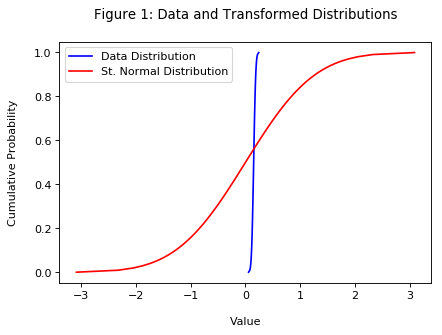

In [5]:
#график № 1
#на нём отображу Data относительно P-values и Standard Normal относительно P-values

figure1 = plt.figure(figsize = (6, 4), dpi = 80, facecolor = 'w', edgecolor = 'k') #создаю фигуру и определяю её параметры
plt.title(label = 'Figure 1: Data and Transformed Distributions\n', fontsize = 12, loc = 'center') #заголовок для фигуры

#непосредственно сами графики
plt.plot(Data_values, P_values, c = 'blue', label = 'Data Distribution')
plt.plot(Standard_Normal_values, P_values, c = 'red', label = "St. Normal Distribution")
plt.legend(loc = 'best') #задаю расположение легенды

plt.xlabel('\nValue', fontsize = 10) #добавляю надпись для оси абсцисс и задаю размер
plt.ylabel('Cumulative Probability\n', fontsize = 10) #тоже самое для оси ординат

Text(0, 0.5, 'Standard Normal\n')

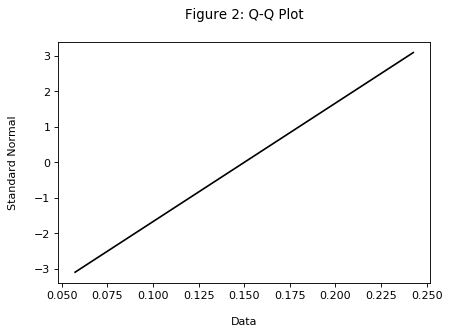

In [6]:
#график № 2 - Q-Q (quantile-quantile) plot
#этот график используется для сравнения двух распределений

figure2 = plt.figure(figsize = (6, 4), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.title(label = 'Figure 2: Q-Q Plot\n', fontsize = 12, loc = 'center')

plt.plot(Data_values, Standard_Normal_values, c = 'black')

plt.xlabel('\nData', fontsize = 10)
plt.ylabel('Standard Normal\n', fontsize = 10)

#у нас получилась прямая линия, что указывает на, если так можно сказать, "идеальное" нормальное распределение

In [7]:
import numpy as np #подключаю для вычислений

#настало время для создания основного класса
class Main:
    
    #1. Data
    def __init__(self, x, y, value): #в качестве аргументов задаю x, y и value
        self.x = x
        self.y = y
        self.value = value

#метод для вычисления Gaussian
    def gaussian(self):
        gaussian_values = []
        for cell in data:
            gaussian_values.append(norm.ppf(norm(loc = mean, scale = standard_deviation).cdf(cell.value)))
        gaussian_mean = np.average(gaussian_values)
        return gaussian_values, gaussian_mean
        
#метод для вычисления mean (для Point 1, 2, 3 и unknown)
    def data_mean(self):
        cell_values = []
        for cell in data:
            cell_values.append(cell.value)
            mean_values = np.average(cell_values)
        return mean_values


    #2. Distance Matrix
#метод для вычисления матрицы расстояний
    def distance_matrix(self):
        distance_matrix_values = []
        for cell in data:
            current_cell = cell
            interim = []
            for cell in data:
                #пройдусь по каждому значению point
                interim.append(np.sqrt(np.power((current_cell.x - cell.x), 2) + np.power((current_cell.y - cell.y), 2)))
                #добавлю значения, свойственные unknown
            interim.append(np.sqrt(np.power((current_cell.x - unknown.x), 2) + np.power((current_cell.y - unknown.y), 2)))
            distance_matrix_values.append(interim)
        return distance_matrix_values


    #4. Variogram Matrix
#метод для вычисления матрицы вариограммы
    def variogram_matrix(self):
        variogram_matrix_values = []
        for matrix in distance_matrix:
            interim = []
            for element in matrix:
                if element > v_range:
                    calc = (element / v_range) - 0.5 * (element/v_range)**3
                else:
                    calc = 1.5 * ((element/v_range) - 0.5 * (element/v_range)**3)
                interim.append((nugget + spherical) * calc)
            variogram_matrix_values.append(interim)
        return variogram_matrix_values
    

    #5. Covariance Matrix         
#метод для вычисления ковариационной матрицы
    def covariance_matrix(self):
        covariance_matrix_values = []
        for matrix in variogram_matrix:
            interim = []
            for element in matrix:
                interim.append((nugget + spherical) - element)
            covariance_matrix_values.append(interim)    
        return covariance_matrix_values


    # 6. Inverse Left Side
#метод для вычисления обратной матрицы для левой части матрицы ковариации
    def inverse_left_side(self):
        cut_unknown = []
        for element in covariance_matrix:
            element = element[:-1]
            cut_unknown.append(element)
        cut_unknown
        #воспользуюсь numpy.linalg.inv, чтобы рассчитать обратную матрицу к матрице covariance matrix
        inverse_left_side_values = np.linalg.inv(cut_unknown)
        return inverse_left_side_values
      

    # 7. Weights
#метод для вычисления весов (Simple Kriging Weights)      
    def weights(self):
        unknown_values_matrix = []
        for matrix in covariance_matrix:
            unknown_values_matrix.append(matrix[-1])
        #умножение матрицы на матрицу
        weights = np.dot(inverse_left_side, unknown_values_matrix) #или np.matmul
        sum_of_weights = np.sum(weights) #вычислю сумму весов
        return weights, sum_of_weights, unknown_values_matrix


    # 8. Kriging Results
#метод для вычисления оценки Кригинга
    def kriging_estimate(self):
        kriging_estimate = np.matmul(gaussian_values, weights) + ((1 - sum_of_weights) * gaussian_mean)
        return kriging_estimate
    
#метод для вычисления дисперсии Кригинга
    def kriging_variance(self):
        kriging_variance = (nugget + spherical) - np.matmul(unknown_values_matrix, weights)
        return kriging_variance

Теперь уже я буду применять класс Main и обращаться к методам этого класса, так скажем пожинать плоды

_______________________________________________________________________________________________________________________________
#### 1. Data

In [8]:
#ввожу координаты данных и их значения
point1 = Main(70, 50, 0.1)
point2 = Main(5, 43, 0.14)
point3 = Main(18, 29, 0.2)
unknown = Main(40, 30, None)

data = [point1, point2, point3]

data_mean = Main.data_mean(data)
print('mean', data_mean.round(3))

gaussian_values, gaussian_mean = Main.gaussian(data)
gaussian_values

mean 0.147


[-1.6666666666666665, -0.3333333333333327, 1.6666666666666672]

Text(0, 0.5, 'Y Coordinate\n')

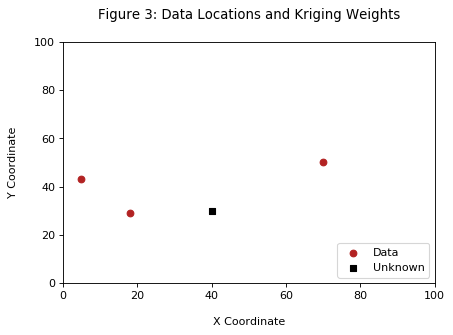

In [9]:
#воссоздаю график № 3
#наглядно отображает координаты данных, их локацию относительно друг друга

X = []
Y = []
for cell in data:
    X.append(cell.x)
    Y.append(cell.y)

figure3 = plt.figure(figsize = (6, 4), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.title(label = 'Figure 3: Data Locations and Kriging Weights\n', fontsize = 12, loc = 'center')

plt.scatter(X, Y, c = 'firebrick', label = 'Data')
plt.scatter(unknown.x, unknown.y, c = 'black', marker = 's', label = "Unknown")
plt.legend(loc = 'lower right')

plt.axis([0, 100, 0, 100])
plt.xlabel('\nX Coordinate', fontsize = 10)
plt.ylabel('Y Coordinate\n', fontsize = 10)

#### 2. Distance Matrix

In [10]:
distance_matrix = Main.distance_matrix(data)
distance_matrix

[[0.0, 65.37583651472461, 56.08029957123981, 36.05551275463989],
 [65.37583651472461, 0.0, 19.1049731745428, 37.33630940518894],
 [56.08029957123981, 19.1049731745428, 0.0, 22.02271554554524]]

#### 3. Variogram Model

In [11]:
#задам параметры нашей модели вариограммы с указанием nugget effect, сферической модели и диапазона
nugget = 0
spherical = 1
v_range = 300

variogram_model = {'Nugget': nugget, 'Spherical': spherical, 'Range': v_range}
variogram_model

{'Nugget': 0, 'Spherical': 1, 'Range': 300}

#### 4. Variogram Matrix

In [12]:
variogram_matrix = Main.variogram_matrix(data)
variogram_matrix

[[0.0, 0.31911761798295823, 0.2755022605742116, 0.17897555914594857],
 [0.31911761798295823, 0.0, 0.09533116267247212, 0.18523580215619934],
 [0.2755022605742116, 0.09533116267247212, 0.0, 0.10981688280995983]]

#### 5. Covariance Matrix

In [13]:
covariance_matrix = Main.covariance_matrix(data)
covariance_matrix

[[1.0, 0.6808823820170418, 0.7244977394257883, 0.8210244408540515],
 [0.6808823820170418, 1.0, 0.9046688373275279, 0.8147641978438007],
 [0.7244977394257883, 0.9046688373275279, 1.0, 0.8901831171900402]]

#### 6. Inverse Left Side

In [14]:
inverse_left_side = Main.inverse_left_side(data)
inverse_left_side

array([[ 2.12073174, -0.29726981, -1.26753462],
       [-0.29726981,  5.54905676, -4.80468742],
       [-1.26753462, -4.80468742,  6.26497695]])

#### 7. Weights

In [15]:
weights, sum_of_weights, unknown_values_matrix = Main.weights(data)
print('Weights:', weights)
print('Sum of Weights:', sum_of_weights)

Weights: [3.70629876e-01 5.53743211e-05 6.21612515e-01]
Sum of Weights: 0.9922977647295178


#### 8. Kriging Results

In [16]:
kriging_estimate = Main.kriging_estimate(data)
kriging_variance = Main.kriging_variance(data)
print('Kriging Estimate:', kriging_estimate)
print('Kriging Variance', kriging_variance)

Kriging Estimate: 0.41743013572395227
Kriging Variance 0.14230973051020634


#### 9. Simulation Results

In [21]:
#для Simulation Results создам отдельный класс

class Simulation_Results:
    
    #суть работы класса - применение имитационного моделирование (метода Монте-Карло)
    #(учитывая гауссово распределение для локального CDF) с целью моделирования реализаций
    
    #при этом, так как в начале я преобразовывал данные и переходил к стандартному нормальному распределению
    #то сейчас мне необходимо сделать обратное преобразование (back transform)
    
    def __init__(self, realization, simulation, back_transformed):
        self.realization = realization
        self.simulation = simulation
        self.back_transformed = back_transformed

r_list = []

increment = 1
realization_number = 10 #указываю количество реализаций

for realization in range(realization_number):
    data = []
    data.append(increment)
    #можно заметить, что здесь имеется случайный характер, следовательно при каждом вызове этого класса
    #значения 'Simulation' и 'Back Transformed' будут незначительно, но отличаться
    #как минимум, потому что это имитационное моделирование
    simulation = norm.ppf(np.random.uniform(0,1), kriging_estimate, kriging_variance)
    data.append(simulation)
    ncrv = norm(0, 1).cdf(simulation)
    back_transformed = norm.ppf(ncrv, mean, standard_deviation)
    data.append(back_transformed)
    realization = Simulation_Results(increment, simulation, back_transformed)
    increment += 1
    r_list.append(data)

#передам значения реализаций в DataFrame и назову колонки должным образом
df2 = pd.DataFrame(data = r_list, columns = ['Realization', 'Simulation', 'Back Transformed'])
#вывод значений 10 полученных реализаций
df2

,Realization,Simulation,Back Transformed
0,1,0.602352,0.168071
1,2,0.281165,0.158435
2,3,0.323173,0.159695
3,4,0.380031,0.161401
4,5,0.450293,0.163509
5,6,0.474026,0.164221
6,7,0.260846,0.157825
7,8,0.455564,0.163667
8,9,0.409609,0.162288
9,10,0.391395,0.161742


Интерпретация хода работы, используемых методов, а также анализ работы и результатов будут приведены в отчётной документации

_______________________________________________________________________________________________________________________________
<font size="+2"><font color='red'><center>THE END